In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

Import data

In [56]:
df = pd.read_csv("U.S. Presidents Birth and Death Information - Sheet1.csv")

In [57]:
df.head()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va."
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass."
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va."
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va."
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York"


Change BIRTH DATE and DEATH DATE to datetime data type

In [58]:
df.dtypes

PRESIDENT            object
BIRTH DATE           object
BIRTH PLACE          object
DEATH DATE           object
LOCATION OF DEATH    object
dtype: object

In [59]:
df['BIRTH DATE'] = pd.to_datetime(df['BIRTH DATE'])
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'])

In [60]:
df.head()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
0,George Washington,1732-02-22,"Westmoreland Co., Va.",1799-12-14,"Mount Vernon, Va."
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass."
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va."
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va."
4,James Monroe,1758-04-28,"Westmoreland Co., Va.",1831-07-04,"New York, New York"


Assign new dataframe that drop the last row

In [61]:
df_presidents = df[:-1]

In [62]:
df_presidents['DEATH DATE'].isna().sum()

6

In [63]:
df_presidents.tail(6)

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
39,George Bush,1924-06-12,"Milton, Mass.",2018-11-30,"Houston, Texas"
40,Bill Clinton,1946-08-19,"Hope, Arkansas",NaT,NaN
41,George W. Bush,1946-07-06,"New Haven, Conn.",NaT,NaN
42,Barack Obama,1961-08-04,"Honolulu, Hawaii",NaT,NaN
43,Donald Trump,1946-06-14,"New York, New York",NaT,NaN
44,Joe Biden,1942-11-20,"Scranton, Pa.",NaT,NaN


Create new attributes and do some calculation

In [64]:
df_presidents['year_of_birth'] = df_presidents['BIRTH DATE'].dt.year
df_presidents['lived_days'] = df_presidents['DEATH DATE'] - df_presidents['BIRTH DATE']
df_presidents.loc[df_presidents['lived_days'].isna(), 'lived_days'] = pd.to_datetime('now') - df['BIRTH DATE']
df_presidents['lived_years'] = df_presidents['lived_days'] / 365
df_presidents['lived_months'] = df_presidents['lived_days'] / 30

In [65]:
df_presidents.head()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_days,lived_years,lived_months
0,George Washington,1732-02-22,"Westmoreland Co., Va.",1799-12-14,"Mount Vernon, Va.",1732,24767 days,67 days 20:30:54.246575342,825 days 13:36:00
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735,33119 days,90 days 17:41:15.616438356,1103 days 23:12:00
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743,30397 days,83 days 06:42:24.657534246,1013 days 05:36:00
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751,31150 days,85 days 08:13:09.041095890,1038 days 08:00:00
4,James Monroe,1758-04-28,"Westmoreland Co., Va.",1831-07-04,"New York, New York",1758,26729 days,73 days 05:31:23.835616438,890 days 23:12:00


Change new attributes datatype to integer

In [66]:
df_presidents['year_of_birth'] = df_presidents['year_of_birth'].astype(int)
df_presidents['lived_years'] = df_presidents['lived_years'].dt.days.astype(int)
df_presidents['lived_months'] = df_presidents['lived_months'].dt.days.astype(int)
df_presidents['lived_days'] = df_presidents['lived_days'].dt.days.astype(int)

In [67]:
df_presidents.dtypes

PRESIDENT                    object
BIRTH DATE           datetime64[ns]
BIRTH PLACE                  object
DEATH DATE           datetime64[ns]
LOCATION OF DEATH            object
year_of_birth                 int32
lived_days                    int32
lived_years                   int32
lived_months                  int32
dtype: object

Top 10 longest lived

In [68]:
df_presidents.sort_values(by='lived_days', ascending=False).head(10).reset_index(drop=True)

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_days,lived_years,lived_months
0,Jimmy Carter,1924-10-01,"Plains, Georgia",NaT,NaN,1924,35868,98,1195
1,George Bush,1924-06-12,"Milton, Mass.",2018-11-30,"Houston, Texas",1924,34504,94,1150
2,Gerald Ford,1913-07-14,"Omaha, Nebraska",2006-12-26,"Rancho Mirage, Cal.",1913,34133,93,1137
3,Ronald Reagan,1911-02-06,"Tampico, Illinois",2004-06-05,"Los Angeles, Cal.",1911,34088,93,1136
4,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735,33119,90,1103
5,Herbert Hoover,1874-08-10,"West Branch, Iowa",1964-10-20,"New York, New York",1874,32943,90,1098
6,Harry S. Truman,1884-05-08,"Lamar, Missouri",1972-12-26,"Kansas City, Missouri",1884,32373,88,1079
7,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751,31150,85,1038
8,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743,30397,83,1013
9,Richard Nixon,1913-01-09,"Yorba Linda, Cal.",1994-04-22,"New York, New York",1913,29688,81,989


Top 10 shortest lived

In [69]:
df_presidents.sort_values(by='lived_days').head(10).reset_index(drop=True)

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_days,lived_years,lived_months
0,John F. Kennedy,1917-05-29,"Brookline, Mass.",1963-11-22,"Dallas, Texas",1917,16978,46,565
1,James A. Garfield,1831-11-19,"Cuyahoga Co., Ohio",1881-09-19,"Elberon, New Jersey",1831,18202,49,606
2,James K. Polk,1795-11-02,"Mecklenburg Co., N.C.",1849-06-15,"Nashville, Tennessee",1795,19583,53,652
3,Abraham Lincoln,1809-02-12,"LaRue Co., Kentucky",1865-04-15,"Washington, D.C.",1809,20516,56,683
4,Chester Arthur,1829-10-05,"Fairfield, Vermont",1886-11-18,"New York, New York",1829,20863,57,695
5,Warren G. Harding,1865-11-02,"Morrow County, Ohio",1923-08-02,"San Francisco, Cal.",1865,21091,57,703
6,William McKinley,1843-01-29,"Niles, Ohio",1901-09-14,"Buffalo, New York",1843,21412,58,713
7,Theodore Roosevelt,1858-10-27,"New York, New York",1919-01-06,"Oyster Bay, New York",1858,21985,60,732
8,Calvin Coolidge,1872-07-04,"Plymouth, Vermont",1933-01-05,"Northampton, Mass.",1872,22099,60,736
9,Barack Obama,1961-08-04,"Honolulu, Hawaii",NaT,NaN,1961,22412,61,747


Descriptive statistics

In [70]:
df_presidents['lived_years'].describe()

count    45.000000
mean     71.933333
std      12.606636
min      46.000000
25%      63.000000
50%      71.000000
75%      80.000000
max      98.000000
Name: lived_years, dtype: float64

In [71]:
df_presidents['lived_days'].describe()

count       45.000000
mean     26423.377778
std       4589.418320
min      16978.000000
25%      23098.000000
50%      26227.000000
75%      29244.000000
max      35868.000000
Name: lived_days, dtype: float64

In [72]:
mean = df_presidents['lived_days'].mean()
weighted_average = np.average(a=df_presidents['lived_days'], weights=df_presidents['lived_years'])
median = df_presidents['lived_days'].median()
mode = ', '.join(str(x) for x in df_presidents['lived_days'].mode().to_list())
max_day = df_presidents['lived_days'].max()
min_day = df_presidents['lived_days'].min()
std = df_presidents['lived_days'].std()

In [73]:
calculate = {'Mean': mean,
    'Weighted average': weighted_average,
    'Median': median, 
    'Mode': mode, 
    'Max': max_day, 
    'Min': min_day, 
    'Standard deviation': std}

In [74]:
df_calculate = pd.DataFrame(calculate, index=['lived_days'])

In [75]:
df_calculate

,Mean,Weighted average,Median,Mode,Max,Min,Standard deviation
lived_days,26423.377778,27209.697251,26227.0,"16978, 18202, 19583, 20516, 20863, 21091, 2141...",35868,16978,4589.41832


Plot the above data

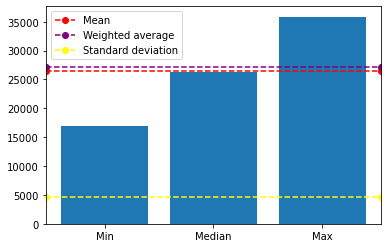

In [76]:
plt.bar(x=['Min', 'Median', 'Max'], height=[min_day, median, max_day])
plt.axhline(mean, marker='o', linestyle='dashed', color='red', label='Mean')
plt.axhline(weighted_average, marker='o', linestyle='dashed', color='purple', label='Weighted average')
plt.axhline(std, marker='o', linestyle='dashed', color='yellow', label='Standard deviation')
plt.legend(labels=['Mean', 'Weighted average', 'Standard deviation'])